### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python

## Data Analytics of Covid_19 Data (Jan 2020 to Oct 2021) in the UK

## Mimi's Github repository

- https://github.com/Mimi-Onno/LSE_DA_COVID_Analysis
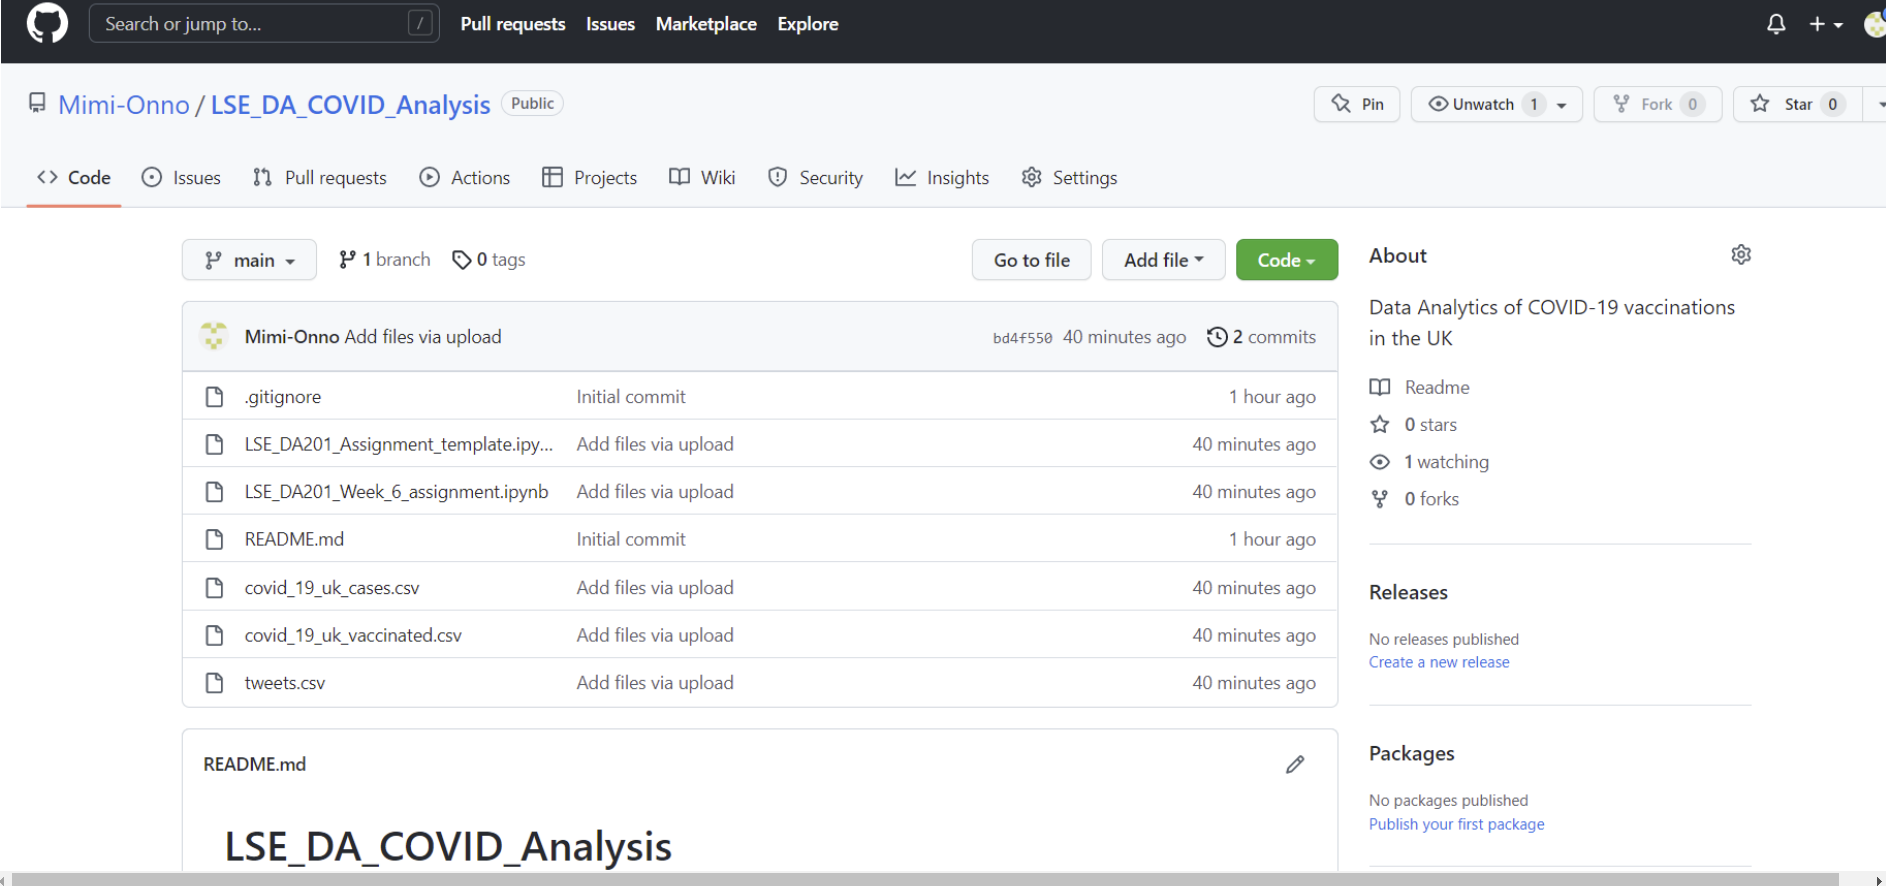


## Prepare Environment

In [1]:
# Import the required libraries and set the plotting options
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sns.set(rc = {'figure.figsize':(15,10)})

## Assignment activity 2: Import and Explore Data

In [2]:
# Load COVID_19_uk_cases.csv and covid_19_uk_vaccinated.csv as cov and vac dataframes respectively
cov = pd.read_csv('covid_19_uk_cases.csv')
vac = pd.read_csv('covid_19_uk_vaccinated.csv')

### Validate cov DataFrame

In [3]:
# View first five rows
cov.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0.0,0.0,0.0,0.0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0.0,0.0,0.0,0.0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0.0,0.0,0.0,0.0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0.0,0.0,0.0,0.0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0.0,0.0,0.0,0.0


In [4]:
# View last five rows and check for meta data at last row
cov.tail()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
7579,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-10,137735.0,8154306.0,0.0,378.0
7580,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-11,137763.0,8193769.0,0.0,386.0
7581,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-12,137944.0,8231437.0,0.0,386.0
7582,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-13,138080.0,8272883.0,0.0,0.0
7583,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-14,138237.0,8317439.0,0.0,0.0


In [5]:
# Determine number of rows and columns
print(cov.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/State            7584 non-null   object 
 1   Country/Region            7584 non-null   object 
 2   Lat                       7584 non-null   float64
 3   Long                      7584 non-null   float64
 4   ISO 3166-1 Alpha 3-Codes  7584 non-null   object 
 5   Sub-region Name           7584 non-null   object 
 6   Intermediate Region Code  7584 non-null   int64  
 7   Date                      7584 non-null   object 
 8   Deaths                    7582 non-null   float64
 9   Cases                     7582 non-null   float64
 10  Recovered                 7582 non-null   float64
 11  Hospitalised              7582 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 711.1+ KB
None


In [6]:
# Describe cov
print(cov.describe())

               Lat         Long  Intermediate Region Code         Deaths  \
count  7584.000000  7584.000000               7584.000000    7582.000000   
mean     21.840267   -41.440047                 12.500000    6210.202321   
std      28.305518    30.527529                 14.009849   24860.790148   
min     -51.796300   -81.254600                  0.000000       0.000000   
25%      17.851075   -64.667625                  0.000000       0.000000   
50%      20.503650   -60.855483                  2.500000       1.000000   
75%      39.448675    -5.152225                 29.000000      25.000000   
max      55.378100    -2.364400                 29.000000  138237.000000   

              Cases    Recovered  Hospitalised  
count  7.582000e+03  7582.000000   7582.000000  
mean   2.147082e+05   454.691242    685.228568  
std    1.007557e+06  1010.642337    819.256635  
min    0.000000e+00     0.000000      0.000000  
25%    1.200000e+01     0.000000    105.000000  
50%    1.685000e+02  

In [7]:
# Determine data types of cov
print(cov.shape)
print(cov.value_counts())

(7584, 12)
Province/State            Country/Region  Lat        Long        ISO 3166-1 Alpha 3-Codes  Sub-region Name                  Intermediate Region Code  Date        Deaths  Cases   Recovered  Hospitalised
Anguilla                  United Kingdom  18.220600  -63.068600  AIA                       Latin America and the Caribbean  29                        2020-01-22  0.0     0.0     0.0        0.0             1
Isle of Man               United Kingdom  54.236100  -4.548100   IMN                       Northern Europe                  0                         2021-10-11  54.0    8121.0  0.0        631.0           1
Montserrat                United Kingdom  16.742498  -62.187366  MSR                       Latin America and the Caribbean  29                        2020-01-30  0.0     0.0     0.0        0.0             1
                                                                                                                                                      2020-01-29  0.0 

In [8]:
# Check for missing values
cov_na = cov[cov.isna().any(axis=1)]
cov_na

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
875,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-21,NaN,NaN,NaN,NaN
876,Bermuda,United Kingdom,32.3078,-64.7505,BMU,Northern America,0,2020-09-22,NaN,NaN,NaN,NaN


> ***Note:*** Missing values:
> 2 rows with missing values found in Bermuda on 21 and 22 Sep 2020.<br>
> Death, Cases, Recovered and Hospitalised fields have 2 missing values.<br>
> Since they are of numeric types, all missing values are replaced with 0.

In [9]:
# Replace all missing values with 0 since they are numeric.
cov = cov.fillna(0)
cov[cov.isna().any(axis=1)]

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised


In [10]:
# Convert Deaths, Cases, Recovered and Hospitalised datatype to int
cov["Deaths"] = cov["Deaths"].astype(int)
cov["Cases"] = cov["Cases"].astype(int)
cov["Recovered"] = cov["Recovered"].astype(int)
cov["Hospitalised"] = cov["Hospitalised"].astype(int)
cov.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0,0,0,0


### Validate vac DataFrame

In [11]:
# View first five rows
vac.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
0,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-22,0,0,0
1,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-23,0,0,0
2,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-24,0,0,0
3,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-25,0,0,0
4,Anguilla,United Kingdom,18.2206,-63.0686,AIA,Latin America and the Caribbean,29,2020-01-26,0,0,0


In [12]:
# View last five rows and check for meta data at last row
vac.tail()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
7579,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-10,1070,1216,1070
7580,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-11,1300,1604,1300
7581,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-12,1482,2027,1482
7582,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-13,0,0,0
7583,Others,United Kingdom,55.3781,-3.436,GBR,Northern Europe,0,2021-10-14,0,0,0


In [13]:
# Determine number of rows and columns
print(vac.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Province/State            7584 non-null   object 
 1   Country/Region            7584 non-null   object 
 2   Lat                       7584 non-null   float64
 3   Long                      7584 non-null   float64
 4   ISO 3166-1 Alpha 3-Codes  7584 non-null   object 
 5   Sub-region Name           7584 non-null   object 
 6   Intermediate Region Code  7584 non-null   int64  
 7   Date                      7584 non-null   object 
 8   Vaccinated                7584 non-null   int64  
 9   First Dose                7584 non-null   int64  
 10  Second Dose               7584 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 651.9+ KB
None


In [14]:
# Determine data types of vac
print(vac.shape)
vac.dtypes

(7584, 11)


Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Vaccinated                    int64
First Dose                    int64
Second Dose                   int64
dtype: object

In [15]:
# Check for missing values
vac_na = vac[vac.isna().any(axis=1)]
vac_na.shape

(0, 11)

In [16]:
# Indentify all columns of cov and vac
print(cov.columns)
print(vac.columns)

Index(['Province/State', 'Country/Region', 'Lat', 'Long',
       'ISO 3166-1 Alpha 3-Codes', 'Sub-region Name',
       'Intermediate Region Code', 'Date', 'Deaths', 'Cases', 'Recovered',
       'Hospitalised'],
      dtype='object')
Index(['Province/State', 'Country/Region', 'Lat', 'Long',
       'ISO 3166-1 Alpha 3-Codes', 'Sub-region Name',
       'Intermediate Region Code', 'Date', 'Vaccinated', 'First Dose',
       'Second Dose'],
      dtype='object')


### Filter for data on only Gibraltar

In [17]:
# Create gibraltar_cov DataFrame filtered by Gibraltar
gibraltar_cov = pd.DataFrame(cov[cov['Province/State']=='Gibraltar']).reset_index(drop = True)
gibraltar_cov.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
0,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0,0,0,0
1,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0,0,0,0
2,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0,0,0,0
3,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0,0,0,0
4,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0,0,0,0


In [18]:
# Create gibraltar_vac DataFrame filtered by Gibraltar
gibraltar_vac = pd.DataFrame(vac[vac['Province/State']=='Gibraltar']).reset_index(drop = True)
gibraltar_vac.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Vaccinated,First Dose,Second Dose
0,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0,0,0
1,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0,0,0
2,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0,0,0
3,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0,0,0
4,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0,0,0


In [19]:
# Print the whole DataFrame of gibraltar_cov
pd.set_option("display.max_rows", None)

gibraltar_cov.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised
0,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0,0,0,0
1,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0,0,0,0
2,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0,0,0,0
3,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0,0,0,0
4,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0,0,0,0


### Join gibraltar_cov and gibraltar_vac DataFrames and subset

In [20]:
# Join the dataframes
gibraltar = pd.merge(gibraltar_cov, gibraltar_vac, how='inner', on=None)
gibraltar.head()

,Province/State,Country/Region,Lat,Long,ISO 3166-1 Alpha 3-Codes,Sub-region Name,Intermediate Region Code,Date,Deaths,Cases,Recovered,Hospitalised,Vaccinated,First Dose,Second Dose
0,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-22,0,0,0,0,0,0,0
1,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-23,0,0,0,0,0,0,0
2,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-24,0,0,0,0,0,0,0
3,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-25,0,0,0,0,0,0,0
4,Gibraltar,United Kingdom,36.1408,-5.3536,GIB,Southern Europe,0,2020-01-26,0,0,0,0,0,0,0


In [21]:
# Desbribe shape
gibraltar.shape

(632, 15)

In [22]:
# Determine the index
gibraltar.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            622, 623, 624, 625, 626, 627, 628, 629, 630, 631],
           dtype='int64', length=632)

> ***Note:*** Reset Gibraltar DataFrame index with 0 - 631, 632 rows in dataset.

In [23]:
# Filter gibraltar DataFrame with Deaths, Cases, Recovered, Hospitalised, First Dose and Second Dose
gibraltar_df = gibraltar[['Deaths', 'Cases', 'Recovered', 'Hospitalised', "First Dose", "Second Dose"]]
gibraltar_df.head()

,Deaths,Cases,Recovered,Hospitalised,First Dose,Second Dose
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [24]:
# Filter gibraltar DataFrame with Deaths, Cases, Recovered and Hospitalised
gibraltar_new = gibraltar[['Deaths', 'Cases', 'Recovered', 'Hospitalised']]
gibraltar_new.head()

,Deaths,Cases,Recovered,Hospitalised
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


### Outliers analysis:<br>
> ***Note:***<br>
Use describe() function to determine the descriptive statistics of gibraltar_new DataFrame<br>
Use pairplot to visualise the distribution of the numeric data and skewness of individual variables

In [25]:
# Describe gibraltar_new
gibraltar_new.describe()

,Deaths,Cases,Recovered,Hospitalised
count,632.000000,632.000000,632.000000,632.000000
mean,40.208861,2237.109177,1512.821203,1027.625000
std,45.332832,2136.268090,1817.096755,1145.681058
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,177.000000,109.500000,157.750000
50%,5.000000,1036.500000,323.500000,675.500000
75%,94.000000,4286.000000,4122.500000,1548.000000
max,97.000000,5727.000000,4670.000000,4907.000000


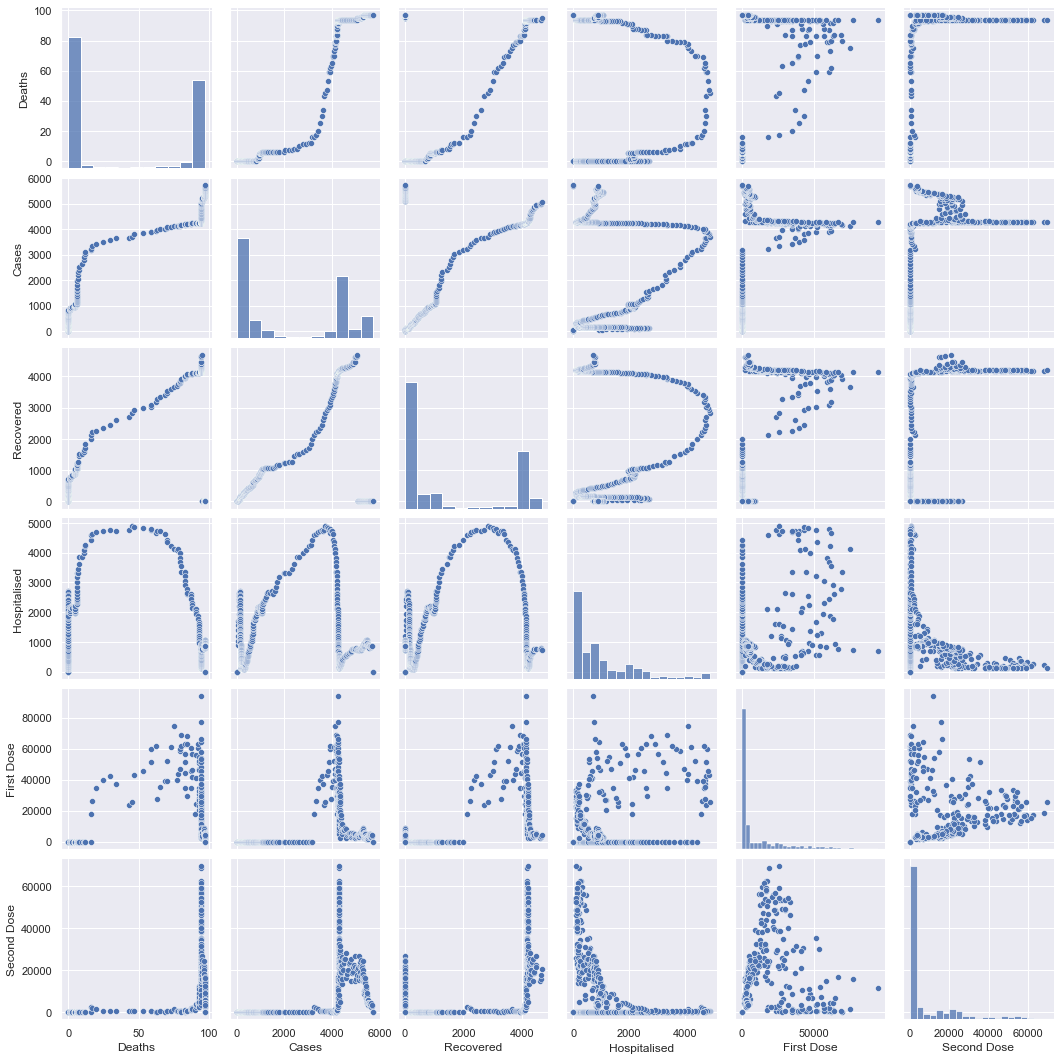

In [26]:
# Visualise the distribution of Cases, Deaths, Hospitalised, Recovered, First Dose and Second Dose
sns.pairplot(gibraltar_df)

>***Observations:*** Recovered and Deaths have a positive regression. As First Dose increases, Deaths, Cases, Hospitalised and  Recovered trends become more scattered. As Second Dose increases, Hospitalised decreases with Deaths, Cases, Hospitalised and Recovered numbers plateaux. As the Cases increase, Hopsitalised increases but later it dropped significantly with the increase of First and Second Doses.

### Number of people received first dose in Gibraltar

In [27]:
# Sum the people who received the first dose
first = gibraltar_vac["First Dose"].sum()
print(first)

5870786


### Number of people received second dose in Gibraltar

In [28]:
# Sum the people who received the second dose
second = gibraltar_vac["Second Dose"].sum()
print(second)

5606041


### Number of people vaccinated in Gibratar

In [29]:
# Sum the people who are vaccinated
vaccinated = gibraltar_vac["Vaccinated"].sum()
print(vaccinated)

5606041


### Number of people not fully vaccinated in Gibraltar

In [30]:
# The difference between First and Second dose
unvaccinated = first - second
print(unvaccinated)

264745


>***Observations:***
The vaccination records only started on 1 November 2021 for First Dose, Second Dose and Vaccinated. As there is time lapse between the two doses so the numbers could be backdated but no information has been provided in the datasets. First and Second Doses increase significantly with Hospitalised increases, and decrease following the downward trends of hopitalised, and flattening of Deaths, Cases and recovered trends. 

## Assignment activity 3: Merge and analyse data

In [31]:
# Create a DataFrame covid from cov and vac dataframes
covid = pd.merge(cov, vac, how='inner', on=None)
covid.shape

(7584, 15)

In [32]:
# Print the total rows in covid
print(len(covid))

7584


In [33]:
# Create covid_new with relevant columns
covid_new = covid[["Province/State", "Country/Region", "Date", "Vaccinated", "First Dose", "Second Dose", "Deaths", "Cases", "Recovered", "Hospitalised"]]
covid_new.shape

(7584, 10)

In [34]:
# Validate covid_new data types
covid_new.dtypes

Province/State    object
Country/Region    object
Date              object
Vaccinated         int64
First Dose         int64
Second Dose        int64
Deaths             int32
Cases              int32
Recovered          int32
Hospitalised       int32
dtype: object

In [35]:
# Fix the date column data type from object type to datetime type
covid_new = covid_new.astype(dtype={'Date': np.datetime64})
covid_new["Date"].head()

0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
Name: Date, dtype: datetime64[ns]

In [36]:
# Validate date data type
covid_new.dtypes

Province/State            object
Country/Region            object
Date              datetime64[ns]
Vaccinated                 int64
First Dose                 int64
Second Dose                int64
Deaths                     int32
Cases                      int32
Recovered                  int32
Hospitalised               int32
dtype: object

In [37]:
# Check for duplicate rows
covid_new.duplicated().sum()

0

> ***Note:*** No duplicates found.

### Find the difference between first and second dose by province/state.<br>
>***Note:*** Partially vaccinated indicates population who are eligible for Second Dose.

In [38]:
# Calculate difference between first and second dose and groupby 'Province/State'
covid_new['Partially Vaccinated'] = covid_new.loc[:, "First Dose"] - covid_new.loc[:, "Second Dose"]
covid_new.groupby('Province/State')
covid_new.head()

,Province/State,Country/Region,Date,Vaccinated,First Dose,Second Dose,Deaths,Cases,Recovered,Hospitalised,Partially Vaccinated
0,Anguilla,United Kingdom,2020-01-22,0,0,0,0,0,0,0,0
1,Anguilla,United Kingdom,2020-01-23,0,0,0,0,0,0,0,0
2,Anguilla,United Kingdom,2020-01-24,0,0,0,0,0,0,0,0
3,Anguilla,United Kingdom,2020-01-25,0,0,0,0,0,0,0,0
4,Anguilla,United Kingdom,2020-01-26,0,0,0,0,0,0,0,0


In [39]:
# Filter by Difference is not zero, followed by Province/State, Date, First Dose, Second Dose, Difference
partial_trend = covid_new['Partially Vaccinated'] != 0
covid_new[partial_trend].loc[:, ["Province/State","Date","First Dose","Second Dose", "Partially Vaccinated"] ]

,Province/State,Date,First Dose,Second Dose,Partially Vaccinated
355,Anguilla,2021-01-11,15233,2181,13052
356,Anguilla,2021-01-12,21804,1687,20117
357,Anguilla,2021-01-13,29289,1023,28266
358,Anguilla,2021-01-14,33253,552,32701
359,Anguilla,2021-01-15,35838,442,35396
360,Anguilla,2021-01-16,31094,275,30819
361,Anguilla,2021-01-17,19961,235,19726
362,Anguilla,2021-01-18,21428,479,20949
363,Anguilla,2021-01-19,36032,395,35637
364,Anguilla,2021-01-20,38168,358,37810


### Find the difference between first and second dose over time by province/state

In [40]:
# Groupby and calculate the difference between first and second dose over time
covid_trend =  pd.DataFrame()
covid_trend['First Dose'] = covid_new.groupby('Province/State')['First Dose'].agg('sum')
covid_trend['Second Dose'] = covid_new.groupby('Province/State')['Second Dose'].agg('sum')
covid_trend['Partially Vaccinated'] = covid_trend['First Dose']  - covid_trend['Second Dose']
covid_trend['Relative Change%'] = covid_trend['Partially Vaccinated']/covid_trend['First Dose']*100

covid_trend.sort_values(by=['Partially Vaccinated'], ascending=False)

,First Dose,Second Dose,Partially Vaccinated,Relative Change%
Province/State,,,,
Gibraltar,5870786,5606041,264745,4.509532
Montserrat,5401128,5157560,243568,4.509577
British Virgin Islands,5166303,4933315,232988,4.509763
Anguilla,4931470,4709072,222398,4.509771
Isle of Man,4226984,4036345,190639,4.510048
Falkland Islands (Malvinas),3757307,3587869,169438,4.509560
Cayman Islands,3522476,3363624,158852,4.509669
Channel Islands,3287646,3139385,148261,4.509640
Turks and Caicos Islands,3052822,2915136,137686,4.510122


In [41]:
# Sort by ascending percentage
covid_trend.sort_values(by=['Relative Change%'], ascending=True)

,First Dose,Second Dose,Partially Vaccinated,Relative Change%
Province/State,,,,
"Saint Helena, Ascension and Tristan da Cunha",2348310,2242421,105889,4.509158
Others,2583151,2466669,116482,4.509299
Bermuda,2817981,2690908,127073,4.509363
Gibraltar,5870786,5606041,264745,4.509532
Falkland Islands (Malvinas),3757307,3587869,169438,4.509560
Montserrat,5401128,5157560,243568,4.509577
Channel Islands,3287646,3139385,148261,4.509640
Cayman Islands,3522476,3363624,158852,4.509669
British Virgin Islands,5166303,4933315,232988,4.509763


>***Observations:***
With absolute number from partially vaccinated, Gibraltar, Montserrat, British Virgin Islands and Aguilla have over 200000 population eligible for second dose. However, there is very insignificant change in relative percentage for the population eligible for seond dose across all provinces. A further analysis is recommended to explore the insights of this difference in trends and patterns.

## Assignment activity 4: Visualise and identify initial trends

The government is looking to promote second dose vaccinations and would like to know the best possible area to test a new campaign. They are looking to target area with the highest number of people who have received a first dose and not a second dose. 

###  Province/State with the highest partially vaccinated
>***Note:*** Partially vaccinated are people who received only the first dose and are eligible for the second dose.
### By absolute change

Text(0.5, 1.0, 'Province/State by Partially Vaccinated(absolute)')

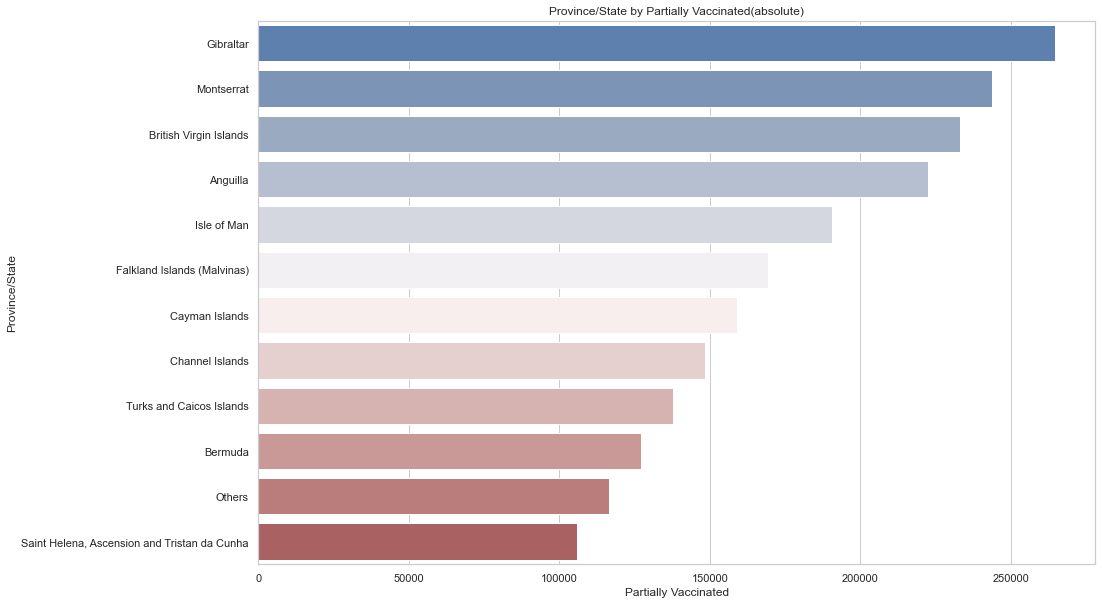

In [42]:
# Create a barplot Partially Vaccinated (absolute) by Provinces/State
covid_trend["Province/State"] = covid_trend.index
sns.set_theme(style="whitegrid")
ax = sns.barplot(y = "Province/State", x='Partially Vaccinated'\
                 , data = covid_trend.sort_values('Partially Vaccinated', ascending = False)\
                 , palette="vlag")
ax.set_title("Province/State by Partially Vaccinated(absolute)")

### By relative change

Text(0.5, 1.0, 'Province/State by Partially Vaccinated(relative)')

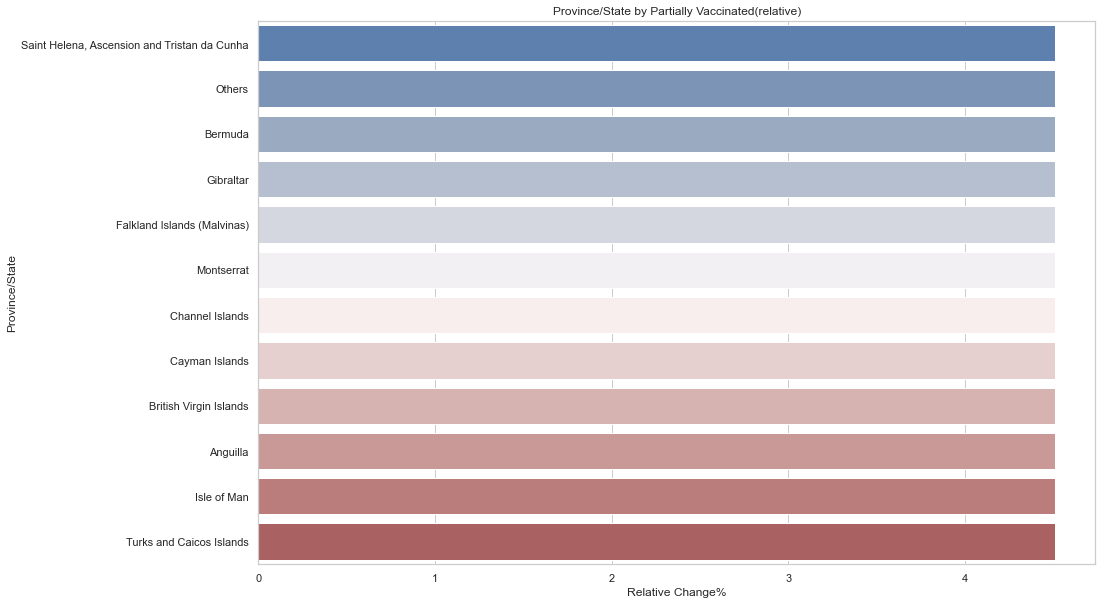

In [43]:
# Create a barplot Partially Vaccinated (relative) by Provinces/State
covid_trend["Province/State"] = covid_trend.index
sns.set_theme(style="whitegrid")
ax = sns.barplot(y = "Province/State", x='Relative Change%'\
                 , data = covid_trend.sort_values('Relative Change%', ascending = True)\
                 , palette='vlag')
ax.set_title("Province/State by Partially Vaccinated(relative)")

In [44]:
# Add Year, Month and Day columns to covid_new

# Add Year column
covid_new['Year'] = pd.DatetimeIndex(covid_new['Date']).year

# Add Month column
covid_new['Month'] = pd.DatetimeIndex(covid_new['Date']).month

# Add Day column
covid_new['Day'] = pd.DatetimeIndex(covid_new['Date']).day

# View covid_new dataframe
covid_new.head()

,Province/State,Country/Region,Date,Vaccinated,First Dose,Second Dose,Deaths,Cases,Recovered,Hospitalised,Partially Vaccinated,Year,Month,Day
0,Anguilla,United Kingdom,2020-01-22,0,0,0,0,0,0,0,0,2020,1,22
1,Anguilla,United Kingdom,2020-01-23,0,0,0,0,0,0,0,0,2020,1,23
2,Anguilla,United Kingdom,2020-01-24,0,0,0,0,0,0,0,0,2020,1,24
3,Anguilla,United Kingdom,2020-01-25,0,0,0,0,0,0,0,0,2020,1,25
4,Anguilla,United Kingdom,2020-01-26,0,0,0,0,0,0,0,0,2020,1,26


In [45]:
# Create dataframe with the highest deaths number by month by province
deaths_trend = pd.DataFrame()
tmp = pd.DataFrame()

# Groupby Province, Year and Month. Filter by Deaths.
tmp = covid_new.groupby(["Province/State", "Year", "Month"])["Deaths"]

# Keep the highest number of the deaths(culmulative number) by month
gpd = tmp.nlargest(n = 1, keep = 'last').reset_index()

# Drop column 'level_3'
deaths_trend = gpd.drop(['level_3'], axis = 1)

# View deaths_trend dataframe
deaths_trend.head()

# Set Day to 1
deaths_trend["Day"] = 1

# Add Date column. Only interested in the Year and Month so it is fine to set Day to 1
deaths_trend["Date"] = pd.to_datetime(deaths_trend[["Year", "Month","Day"]], format='%Y%m%d', errors='ignore')

Text(0.5, 1.0, 'Monthly Deaths Trend across all Province/State')

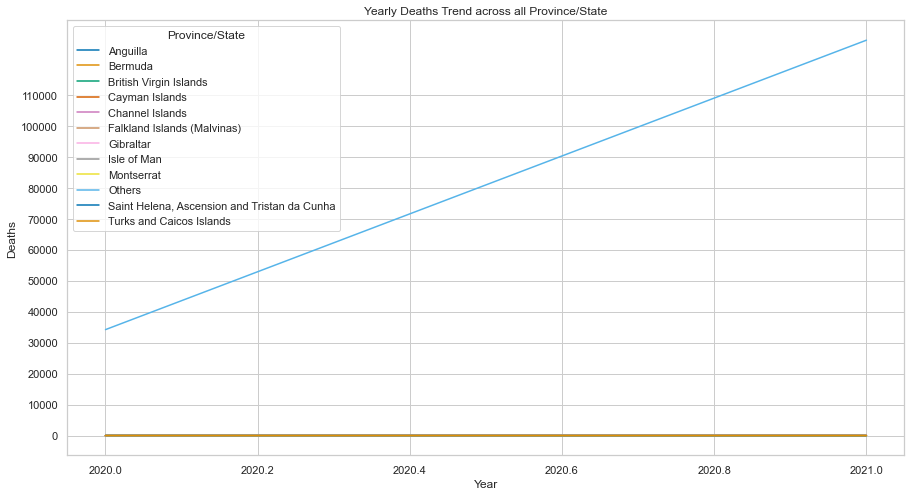

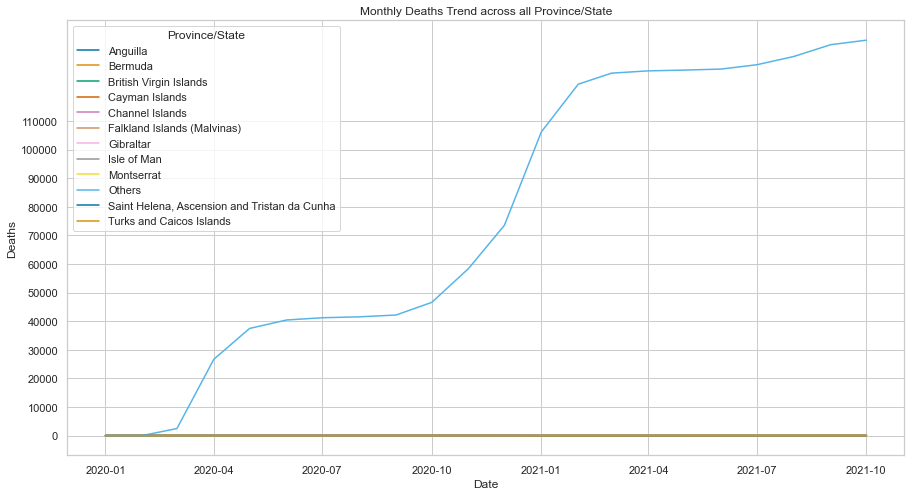

In [46]:
# Create lineplot deaths over province/state by years
plt.figure(figsize=(15, 8))

ax = sns.lineplot( data=deaths_trend, x= "Year", y='Deaths', hue = "Province/State", palette='colorblind', ci = None)
ax.set_yticks(list(range(0, 120000, 10000)))
ax.set_title("Yearly Deaths Trend across all Province/State")

# Create lineplot deaths over province/state by months
plt.figure(figsize=(15, 8))

ax = sns.lineplot( data=deaths_trend, x= "Date", y='Deaths', hue = "Province/State", palette='colorblind', ci = None)
ax.set_yticks(list(range(0, 120000, 10000)))
ax.set_title("Monthly Deaths Trend across all Province/State")

Text(0.5, 1.0, 'Monthly Deaths Trend across all Province/State exclude Others')

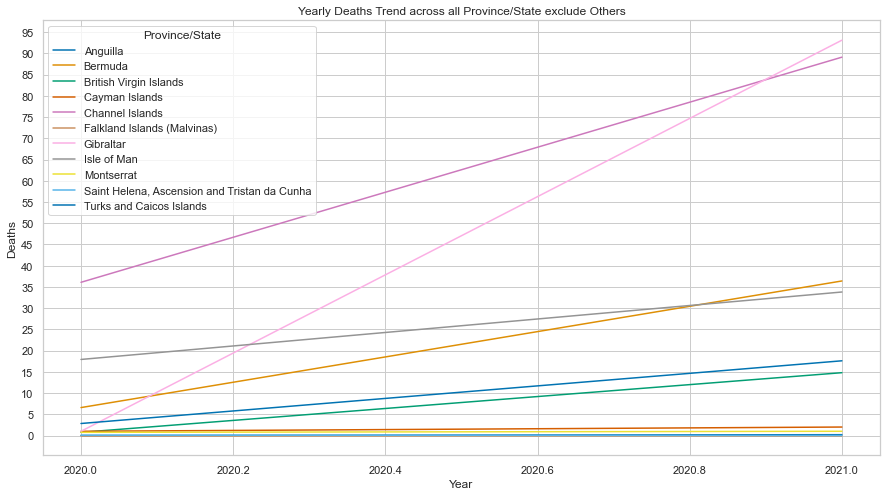

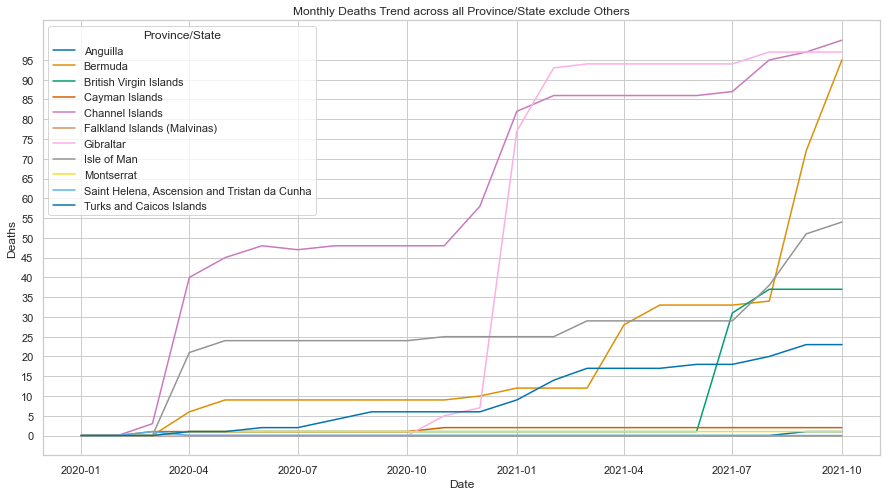

In [47]:
# Exclude "Others" province/state as it skews the datasets by years
exclude_others = deaths_trend.loc[deaths_trend['Province/State'] != 'Others']

plt.figure(figsize=(15, 8))
ax = sns.lineplot( data=exclude_others, x= "Year", y='Deaths', hue = "Province/State", palette='colorblind', ci = None)

ax.set_yticks(list(range(0, 100, 5)))
ax.set_title("Yearly Deaths Trend across all Province/State exclude Others")

# Exclude "Others" province/state as it skews the datasets by months
plt.figure(figsize=(15, 8))
ax = sns.lineplot( data=exclude_others, x= "Date", y='Deaths', hue = "Province/State", palette='colorblind', ci = None)

ax.set_yticks(list(range(0, 100, 5)))
ax.set_title("Monthly Deaths Trend across all Province/State exclude Others")

Text(0.5, 1.0, 'Monthly Recovered Trend across all Province/State(Exclude Others)')

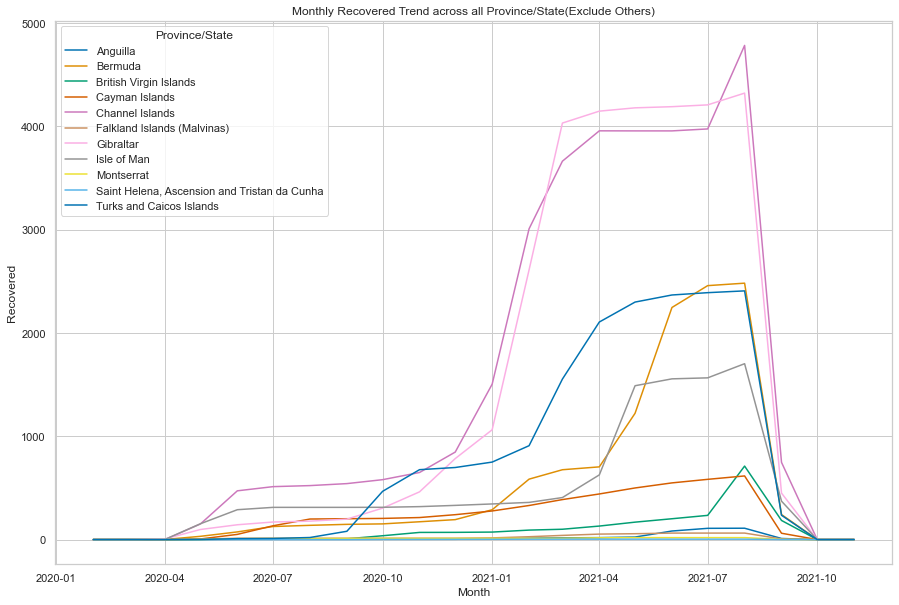

In [48]:
# Prepare recovered_trend_exclude_others dataframe
covid_new['Month']=pd.to_datetime(covid_new['Date']+pd.offsets.MonthBegin(0))
recovered_trend_exclude_others = covid_new.copy()
recovered_trend_exclude_others = covid_new[covid_new['Province/State']!='Others']

# Create lineplot recovery over province/state exclude Others province
ax = sns.lineplot( data=recovered_trend_exclude_others, x= "Month", y='Recovered', hue = "Province/State", palette='colorblind', ci = None)
ax.set_title("Monthly Recovered Trend across all Province/State(Exclude Others)")

## Trends and patterns in Others Province

In [49]:
# Create plot to explore Deaths and Hospitalised in Others province
others_data = pd.DataFrame()
others_data = covid_new[covid_new["Province/State"] == "Others"]
others_data = others_data.reset_index(drop = True)
others_data.head()

,Province/State,Country/Region,Date,Vaccinated,First Dose,Second Dose,Deaths,Cases,Recovered,Hospitalised,Partially Vaccinated,Year,Month,Day
0,Others,United Kingdom,2020-01-22,0,0,0,0,0,0,0,0,2020,2020-02-01,22
1,Others,United Kingdom,2020-01-23,0,0,0,0,0,0,0,0,2020,2020-02-01,23
2,Others,United Kingdom,2020-01-24,0,0,0,0,0,0,0,0,2020,2020-02-01,24
3,Others,United Kingdom,2020-01-25,0,0,0,0,0,0,0,0,2020,2020-02-01,25
4,Others,United Kingdom,2020-01-26,0,0,0,0,0,0,0,0,2020,2020-02-01,26


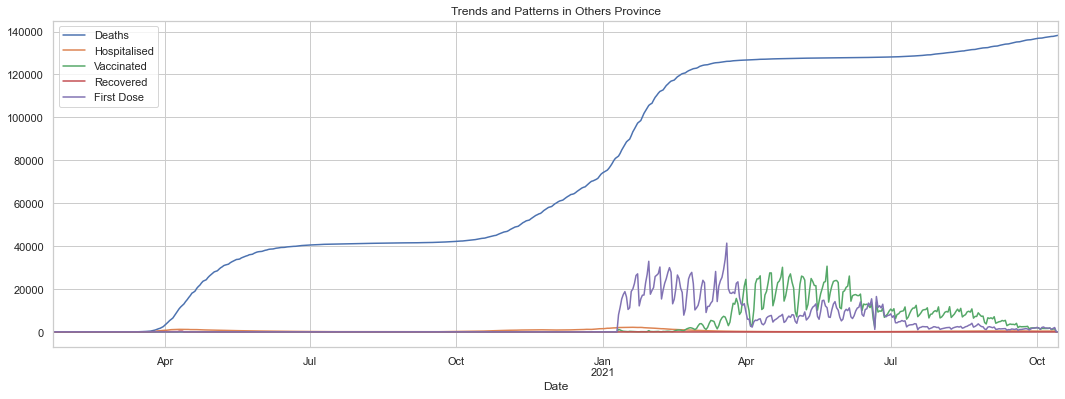

In [50]:
# Explore trends and patterns in Others province
others_data = others_data.set_index("Date")
others_data[["Deaths", "Hospitalised","Vaccinated", "Recovered", "First Dose"]].plot(figsize=(18, 6))

# Specify the legend and title of the plot.
plt.legend(loc='best')
plt.title('Trends and Patterns in Others Province')
plt.show(block=False);

> ***Notes and Observations:***<br>
Deaths numbers are culmulative numbers.<br>
With actual change, the results are significant, the top five areas are:<br>
    >***Gibraltar, British Virgin Islands, Montserrat, Anguilla, Isle of Man***
<br>
With relative percentage change, there is very insignificant differences between first and second across all provinces.<br>
    >***Saint Helena, Ascension and Tristan da Cunha, Others, Bermuda, Gibraltar,Falkland Islands(Malvinas)***

>With deaths across all provinces, ***Others*** province has a very significant high number of deaths. This has skewed the overall results. Exclude ***Others*** province, overall trends of deaths increases. By defining datasets in monthly granular, between Jan to April 2021, in Gibraltar there is an expotential hike of deaths comparing to the rest of the provinces.
In the Channel Islands, a steep increase between April 2020 and June 2020, then it was stable until Jan 2021 when another spike happened.The deaths in the rest of the provinces are gradual with Monserrat, Turks, Saint Helena and Cayman Isalands remains very low and stable in the deaths trend.<br>
Recovered trend in Gibraltar is similar to deaths trend with a hike between Jan to April 2020, further analysis is recommended to find out if there is an increase of vaccinations during this period as the result of the exponential deaths, and which explains the increase in the recovered. In the Channel Islands, the recovered trend is rather flat during the period of April 2020 and June 2020 when the deaths trend was up.


## Assignment activity 5: External data 
With the Tweet dataset, determine whether there are additional `#tags` or keywords that could potentially provide insights into your COVID-19 analysis.

>***Note:*** Code blocks below are adopted from masterclass demo

In [51]:
# Import tweet.csv into tweets DataFrame
tweets = pd.read_csv("tweets.csv")

In [52]:
# Explore tweets data structure
tweets.info()
tweets.head()
tweets.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 3959 non-null   object 
 1   id                         3959 non-null   float64
 2   id_str                     3959 non-null   float64
 3   text                       3959 non-null   object 
 4   truncated                  3959 non-null   object 
 5   source                     3959 non-null   object 
 6   in_reply_to_status_id      0 non-null      float64
 7   in_reply_to_status_id_str  0 non-null      float64
 8   in_reply_to_user_id        0 non-null      float64
 9   in_reply_to_user_id_str    0 non-null      float64
 10  in_reply_to_screen_name    0 non-null      float64
 11  contributors               0 non-null      float64
 12  is_quote_status            3959 non-null   object 
 13  retweet_count              3960 non-null   int64

(3960, 21)

In [53]:
# Count retweet_count
tweets.retweet_count.value_counts()

0       2818
1        570
2        190
3         96
4         54
5         33
6         29
7         17
8         14
11        10
14        10
10         9
9          8
17         8
21         6
12         6
19         5
13         5
16         5
28         4
44         3
27         3
23         3
15         3
37         3
38         2
107        2
54         2
67         2
43         2
25         2
65         1
63         1
48         1
85         1
29         1
30         1
22         1
130        1
89         1
398        1
18         1
32         1
466        1
112        1
90         1
319        1
253        1
116        1
304        1
60         1
79         1
1565       1
369        1
56         1
42         1
118        1
199        1
195        1
963        1
24         1
31         1
49         1
33         1
261        1
212        1
52         1
Name: retweet_count, dtype: int64

In [54]:
# Count favourite_count
tweets.favorite_count.value_counts()

0       2240
1        682
2        252
3        174
4        100
5         75
6         51
7         39
8         38
9         24
10        22
11        16
13        15
12        13
17        12
14        12
24        11
15        11
18         8
16         8
25         7
19         7
22         6
29         5
20         5
23         5
21         5
30         4
39         3
31         3
26         3
40         3
53         3
242        2
27         2
81         2
32         2
47         2
48         2
45         2
89         2
43         2
70         2
33         2
185        2
28         2
65         2
181        1
57         1
71         1
293        1
145        1
621        1
837        1
80         1
149        1
909        1
2251       1
44         1
4376       1
1003       1
66         1
140        1
264        1
72         1
3496       1
649        1
766        1
722        1
79         1
317        1
228        1
85         1
169        1
183        1
147        1
582        1

In [55]:
# Create a DataFrame with the text only
tweets['text'] = tweets['text'].astype(str)
tweets_text = tweets['text'].apply(lambda x: x if x.strip() != None else None)

In [56]:
# Loop through the messages and build a list of values containing the #-symbol
tags = []
for y in [x.split(' ') for x in tweets_text.values]:
    for z in y:
        if '#' in z:
            tags.append(z)

In [57]:
# Create a Series containing the value count in the tags list
tags = pd.Series(tags).value_counts();

In [58]:
# View the first 30 rows
tags.head(30)

#COVID19                1632
#CovidIsNotOver          472
#China                   262
#covid19                 176
#Covid19                 148
#COVID                   108
#covid                   104
#Greece                  103
#coronavirus             100
#PeoplesVaccine.          84
#CoronaUpdate             84
#Omicron                  83
#COVID2020                82
#covid19uk                80
#CoronavirusOutbreak      80
#COVID19Pandemic          80
#monkeypox                77
#globalhealth             76
#publichealth             72
#healthtech               69
#COVID2019                69
#datascience              66
#data                     66
#analytics                64
#Shanghai                 63
#Covid_19                 63
#datavisualization        63
#pandemic                 60
#Athens                   55
#Beijing                  50
dtype: int64

In [59]:
# Convert tags Series into a dataframe
data = pd.DataFrame(tags).reset_index()

# Rename columns
data.columns = ["word", "count"]

# Fix count datatype
data["count"] = data["count"].astype(int)

# View first 20
data.head(20)

,word,count
0,#COVID19,1632
1,#CovidIsNotOver,472
2,#China,262
3,#covid19,176
4,#Covid19,148
5,#COVID,108
6,#covid,104
7,#Greece,103
8,#coronavirus,100
9,#PeoplesVaccine.,84


In [60]:
# Filter and sort only return tweets tweeted over 100 times
display(data.loc[data['count'] > 100])

,word,count
0,#COVID19,1632
1,#CovidIsNotOver,472
2,#China,262
3,#covid19,176
4,#Covid19,148
5,#COVID,108
6,#covid,104
7,#Greece,103


Text(0.5, 1.0, 'Popular Twitter Tags')

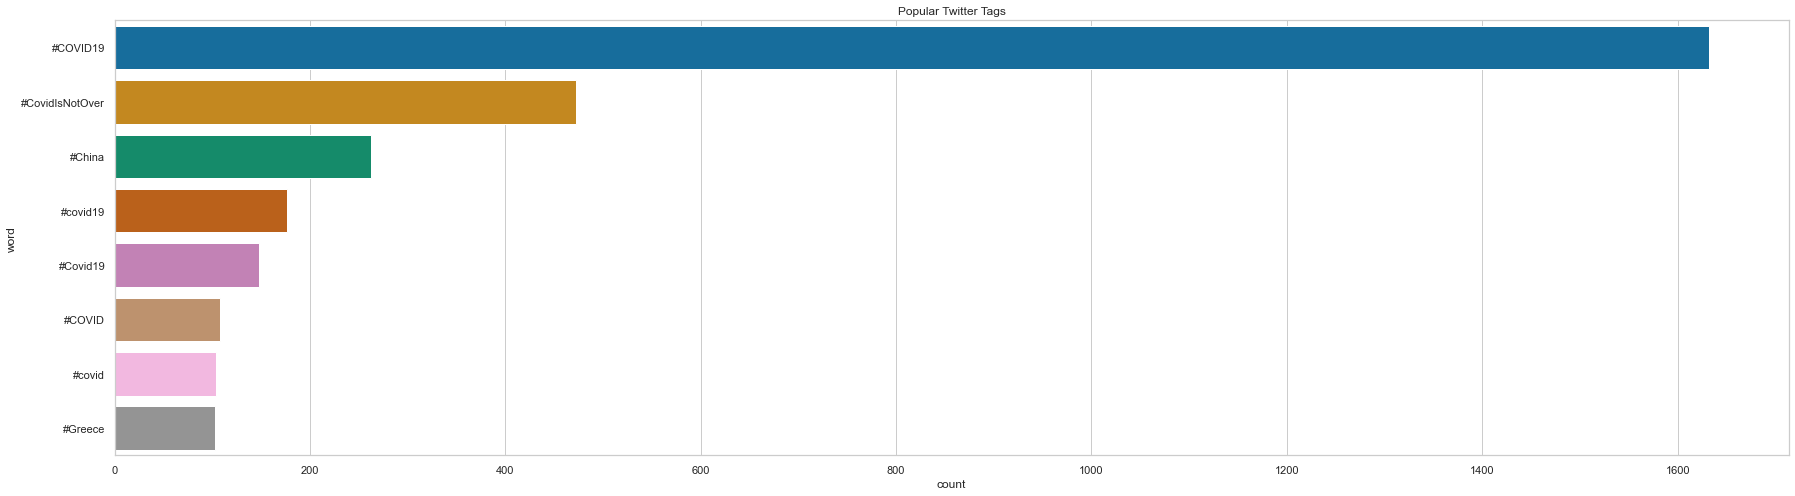

In [61]:
# Plot barplot to view the popular tags
plt.figure(figsize=(30, 8))
ax = sns.barplot( x = "count", y = "word", data = data.loc[data['count'] > 100], palette ='colorblind' )
ax.set_title("Popular Twitter Tags")

***The stop words are downloaded from:***
https://github.com/terrier-org/terrier-desktop/blob/master/share/stopword-list.txt

In [62]:
# Import an external list
url = "https://github.com/igorbrigadir/stopwords/blob/master/en/terrier.txt?raw=True"
external_stopwords = pd.read_csv(url).values.tolist()

# Add more words to the external_stopwords
extra = [' ', 'the', 'to', 'of', 'in', 'and', 'a','is','it','are','this','for','on','not','from','are','with','by']
extra1 = ['that','&','-','at','has','have','|','I','you','we','they','me','&amp;','as','be','people','was','will']
external_stopwords = external_stopwords + extra + extra1

In [63]:
# Convert the text of tweets to a list of tweets
tweets_text_values = tweets_text.values

# Convert each tweet to a list of words
tweets_text_values_words = [x.split(' ') for x in tweets_text_values]

# Create empty list
tweets_text_values_words_all = []

# Append to the list and remove http, mentions and selected keywords
tweets_text_values_words_all = [z for y in tweets_text_values_words for z in y if 'http' not in z and not z.startswith(('@', '#')) and z.lower() not in external_stopwords]

# Create a Series with the value count of keywords identified
tweets_text_values_words_all = pd.Series(tweets_text_values_words_all).value_counts()

In [64]:
# Display the first 20 rows
tweets_text_values_words_all.head(20)

            1738
I            350
Covid        348
Greece       275
COVID-19     267
cases        228
Athens,      211
Athens       209
new          205
more         203
can          201
COVID        198
my           193
all          192
or           192
been         185
but          182
about        181
an           178
our          175
dtype: int64

In [65]:
# Use the first 20 words
data2 = pd.DataFrame(tweets_text_values_words_all.head(20).reset_index())

# Rename the columns
data2.columns = ['word', 'count']

In [66]:
# Exclude whitespace and view results
data2 = data2[data2['word'].str.strip('word') != '']

# View first 20 rows
data2.head(20)

,word,count
1,I,350
2,Covid,348
3,Greece,275
4,COVID-19,267
5,cases,228
6,"Athens,",211
7,Athens,209
8,new,205
9,more,203
10,can,201


Text(0.5, 1.0, 'Popular Twitter Words')

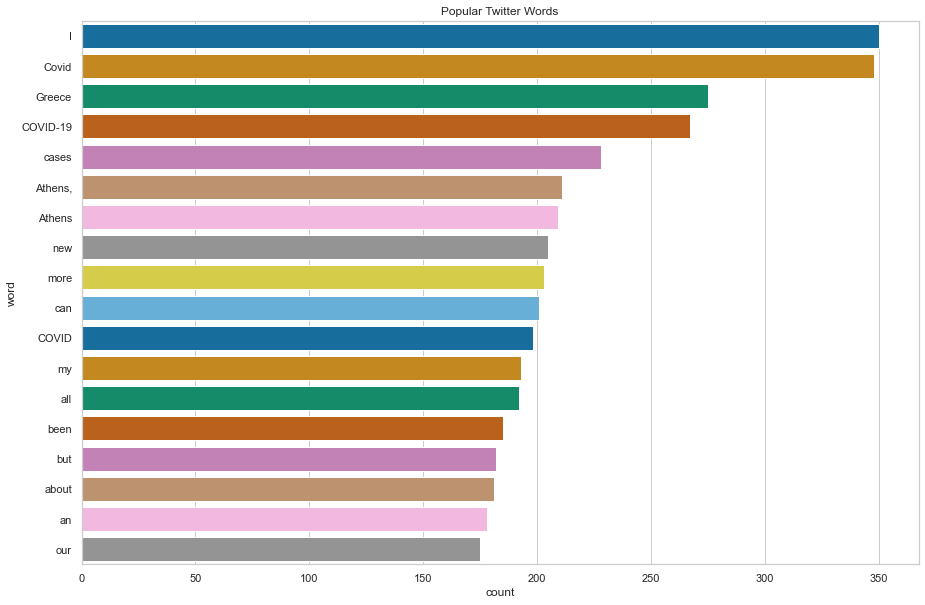

In [67]:
# Plot a barchart with count and word
ax = sns.barplot(x="count", y = "word", data = data2, palette = 'colorblind')
ax.set_title("Popular Twitter Words")

In [68]:
# Create a new dataframe
dft = pd.DataFrame(tweets_text_values)
dft.columns = ["Tweets"]

In [69]:
# Subset the dataframe with identified words
subset = dft[dft['Tweets'].str.contains('cases','risk')]

In [70]:
# View the first 20 rows
subset.head(20)

,Tweets
38,More than 90% of those infected with COVID-19 ...
65,The CDC investigates mysterious cases of #Pedi...
77,Pregnant women have a low risk of having sever...
190,Public Health Ontario's latest data on #COVID1...
207,Does anyone know if there are stats on how man...
210,Hi 👋 ASEAN family\n\n#NewsFromIndonesia🇮🇩\n\n#...
226,#TN #COVID stats (2022-05-23)\nNew Cases=35⬇️\...
233,"23-MAY-2022 UPDATE\n1/11\nIn the past 3 weeks,..."
235,Help slow the spread of #COVID19 and identify ...
239,23-May: #UttarPradesh #COVID19 Bulletin\n\nAct...


>***Observations:***<br>
From the sample dataset provided, most popular trending tags are #COVID19 and words include "Covid", "COVID-19" and "COVID". Then, we review contents of text identified by keywords 'cases' and 'risk'. Further analysis could be carried out using these words to exploring the insigths. Words like "First Dose", and "First Dose" together with the names of the province/state to explore the insight. As the dataset provided is small, limited information could be retrieved, therefore, it is recommended to establish a live connection with API scraping to the Twitter account for bigger data sets for more in depth analysis.

>***Note:*** End of code adoptation from masterclass demo

## Assignment activity 6: Perform Time-series Analysis

In [71]:
# Select data for a specific province
sample = cov[['Province/State','Date','Hospitalised']]
sample_ci = sample[sample['Province/State'] == "Channel Islands"]

sample_ci = sample_ci.reset_index(drop = True)

# Fix date data type to date
sample_ci = sample_ci.astype(dtype={'Date': np.datetime64})

# Reindex on Date
sample_ci = sample_ci.set_index("Date")
sample_ci.head()

,Province/State,Hospitalised
Date,,
2020-01-22,Channel Islands,0
2020-01-23,Channel Islands,0
2020-01-24,Channel Islands,0
2020-01-25,Channel Islands,0
2020-01-26,Channel Islands,0


In [72]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

In [73]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

### Question 1:

The consultant indicated that the function is functional, but did not demonstrate how to use it. Use the provided function, `plot_moving_average()`, to plot the data for the selected province (variable name is `sample_ci` and set the window parameter to 7 days. 

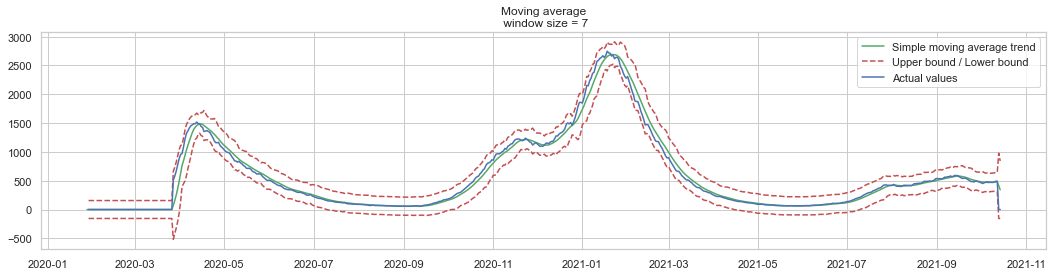

In [74]:
# Plot 7 days rolling average
plot_moving_average(sample_ci.Hospitalised, 7, plot_intervals=True)

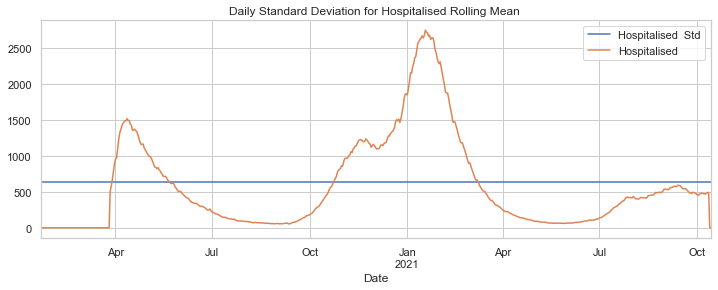

In [75]:
# Plot the running average of the standard deviation everyday
# standard deviation of the rolling mean for each day.
sd_data = sample_ci.copy()
sd_data["Hospitalised  Std"] = np.std(sd_data["Hospitalised"])
sd_data[["Hospitalised  Std","Hospitalised"]].plot(figsize=(12, 4))

# Specify the legend and title of the plot.
plt.legend(loc='best')
plt.title('Daily Standard Deviation for Hospitalised Rolling Mean ')
plt.show(block=False);

### Question 2:

The consultant performed a calculation that looks interesting, but the team is unsure about what the intention was and how to interpret the output. Can you offer some insights into the meaning of the code and output in the cell below? Is it useful?

In [76]:
# Return the top three days with biggest difference between daily value and rolling 7-day mean
s = sample_ci.copy()

# Filter by Hospitalised, and calculate the mean of rolling 7 days average
s_rolling = s['Hospitalised'].rolling(window=7).mean()

# Calculate the mean absolute error
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])

# Sort the error Series by descending order, and select the top 3 rows
s.sort_values('error', ascending=False).head(3)

,Province/State,Hospitalised,error
Date,,,
2020-03-27,Channel Islands,509,436.285714
2020-03-28,Channel Islands,579,423.571429
2020-03-29,Channel Islands,667,416.285714


>***Note:***
Return the top three days where the mean absolute error between the actual and 7 rolling average is the highest.

### Question 3:

> ***3.1 What is the difference between qualitative and quantitative data?***<br>
Qualitative data, also known as categorical data. They are based on groups, interpretation, and description. Examples include provinces, tweet tags, tweet texts. Quantitative data are data which can be measured in numbers, and can be applied in  statistical and mathematical manipulations. Examples include numbers of first dose, second dose, deaths and hospitalised.<br>
Business can use quantitative data to find out how many, how much, or how often using calculations and apply statistical analysis to understand the past events and predict the probability of the future. Qualitative data helps business to understand why, how, or what happened behind certain behaviours, judgements and opinions, and make short term predictions.

>***3. 2 Can you provide you observations around why continuous improvement is required, can we not just implement the project and move on to other pressing matters?***<br>
The datasets from .csv files provided give some insights of the past trends and patterns of the covid vaccinations between January 2020 and October 2021 in the provinces. However, continuous improvements and adjustments are required because the Covid-19 is constantly changing, mutating and evolving with new variants. This project will, therefore, have to be maintained, updated and follow the changes in social, scientific, environment and other important contexts to provide good insights for business decision makings.

>***3.3 As a government, we adhere to all data protection requirements and have good governance in place. Does that mean we can ignore data ethics? We only work with aggregated data and therefore will not expose any personal details? (Provide an example of how data ethics could apply to this case; two or three sentences max)***<br>
Data ethics should be applied universally and have no boundaries even in the political context. They cannot be ignored. Even though the datasets are aggregated from the .csv files, data ethics have to apply to the use of data scrapped from TWEETS by filtering out and masking any personal details found in the Tweet texts.